In [90]:
%autoreload 2 
%matplotlib inline

In [91]:
%%javascript
IPython.OutputArea.auto_scroll_threshold = 9999;

<IPython.core.display.Javascript object>

In [92]:
from __future__ import (print_function, unicode_literals, 
                        division, absolute_import)

In [93]:
import h5py
import pandas as pd
import numpy as np 

In [94]:
import matplotlib.pyplot as plt
import sys
sys.path.append("../")

In [95]:
import extract_catalog as ext_cat
import get_gal_centroids as getg
import plot_clst_prop as plotClst
from IPython.html.widgets import interact

In [96]:
dataPath = "../../data/"

In [97]:
original_f = h5py.File(dataPath + 
                "Illustris-1_fof_subhalo_myCompleteHaloCatalog_00135.hdf5")
df = ext_cat.extract_clst(original_f, clstNo)
pos = [k for k in df.keys() if "SubhaloPos" in k]

rotating points by angle xi

easier to think: 
* keep los as z axis 
* rotate this los 

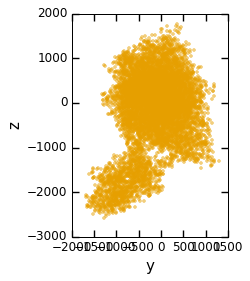

In [98]:
final_los_along_x = df[pos][:10000].apply(lambda x: 
         getg.project_coords(x, xi=0, phi=0, 
                             los_axis=4), axis=1)
final_los_along_x = np.array(final_los_along_x)
plt.axes().set_aspect('equal')
plt.plot(final_los_along_x[:, 0], 
         final_los_along_x[:, 1], '.', alpha=0.5)
plt.xlabel('y')
plt.ylabel('z')

In [99]:
from get_gal_centroids import same_projection, angles_give_same_projections
from get_gal_centroids import angles_given_HEALpix_nsides

In [100]:
from healpy import pix2ang
from healpy.pixelfunc import nside2npix

In [101]:
xi_uni, phi_uni = angles_given_HEALpix_nsides(1)

In [102]:
zip(xi_uni * 180. / np.pi, phi_uni * 180. / np.pi)

[(45.0, 48.189685104221404),
 (135.0, 48.189685104221404),
 (0.0, 90.0),
 (90.0, 90.0),
 (45.0, 131.81031489577862),
 (135.0, 131.81031489577862)]

# confirm that we found the identical projections

In [134]:
alpha = 0.2
clstNo = 0 

nside = 8
npix = nside2npix(nside)
xi_arr, phi_arr = pix2ang(nside, range(npix), nest=True)

sameP, combo = angles_give_same_projections(phi_arr, xi_arr)

first_half, second_half = combo[sameP].transpose()


In [136]:
first_half_xi = xi_arr[first_half]
first_half_phi = phi_arr[first_half]
sec_half_xi = xi_arr[second_half]
sec_half_phi = phi_arr[second_half]

In [ ]:
sec_half_phi 

In [138]:
first_half_xi + sec_half_xi - np.pi < np.

array([ 3.14159265,  3.14159265,  3.14159265,  3.14159265,  3.14159265,
        3.14159265,  3.14159265,  3.14159265,  3.14159265,  3.14159265,
        3.14159265,  3.14159265,  3.14159265,  3.14159265,  3.14159265,
        3.14159265,  3.14159265,  3.14159265,  3.14159265,  3.14159265,
        3.14159265,  3.14159265,  3.14159265,  3.14159265,  3.14159265,
        3.14159265,  3.14159265,  3.14159265,  3.14159265,  3.14159265,
        3.14159265,  3.14159265,  3.14159265,  3.14159265,  3.14159265,
        3.14159265,  3.14159265,  3.14159265,  3.14159265,  3.14159265,
        3.14159265,  3.14159265,  3.14159265,  3.14159265,  3.14159265,
        3.14159265,  3.14159265,  3.14159265,  3.14159265,  3.14159265,
        3.14159265,  3.14159265,  3.14159265,  3.14159265,  3.14159265,
        3.14159265,  3.14159265,  3.14159265,  3.14159265,  3.14159265,
        3.14159265,  3.14159265,  3.14159265,  3.14159265,  3.14159265,
        3.14159265,  3.14159265,  3.14159265,  3.14159265,  3.14

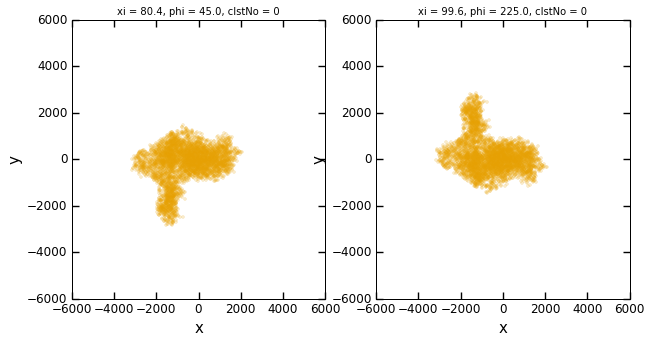

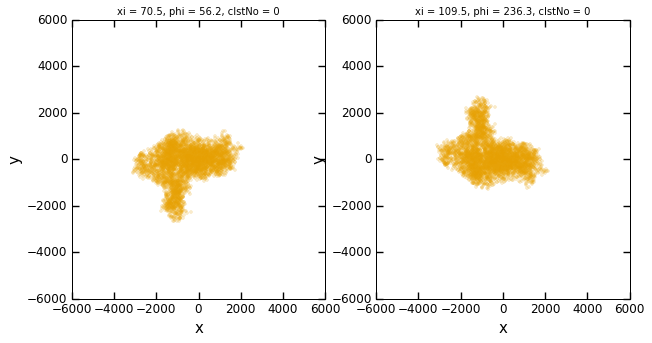

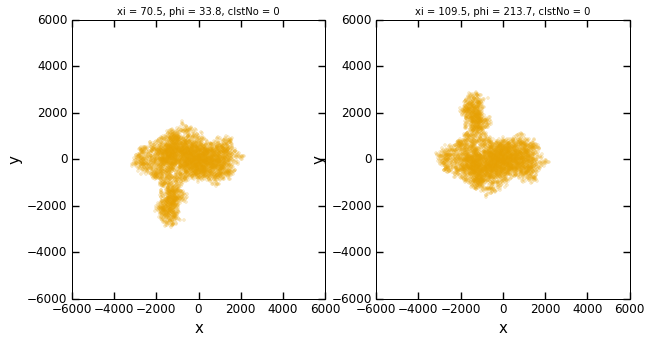

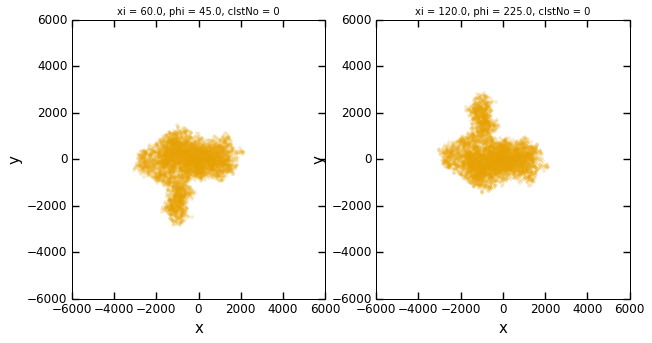

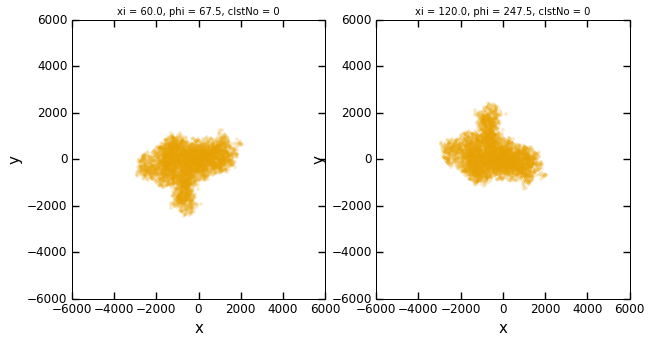

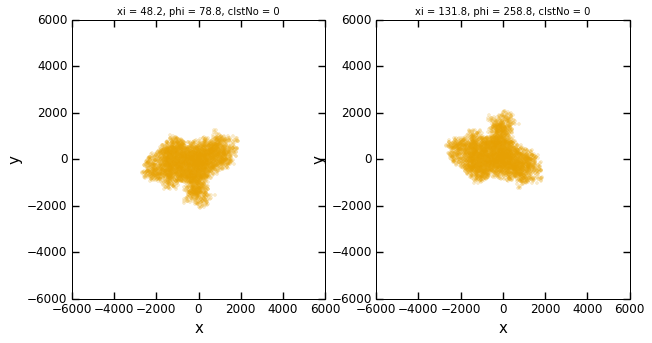

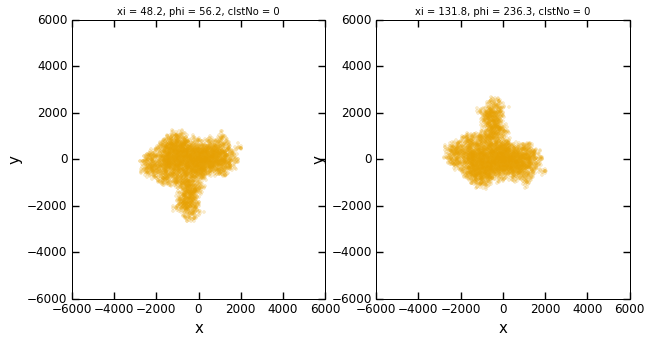

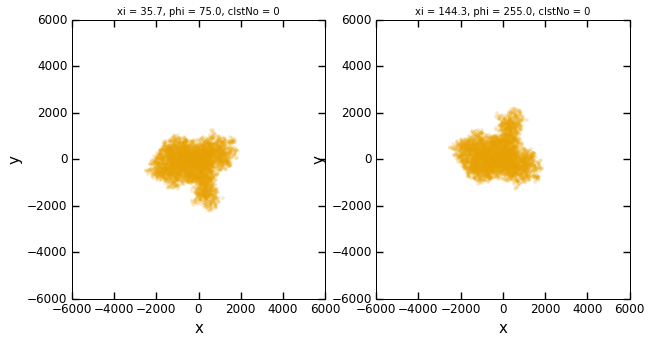

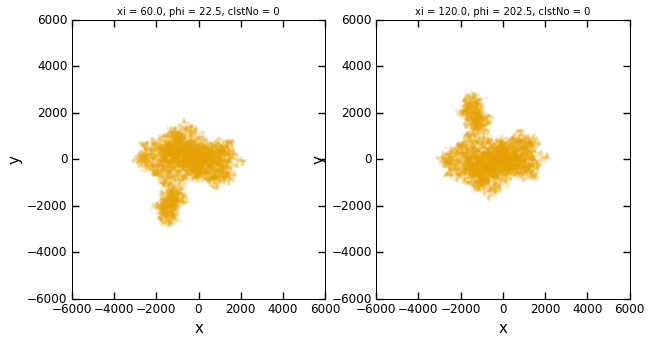

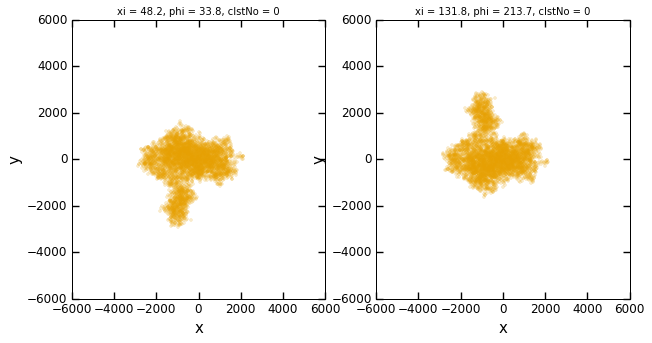

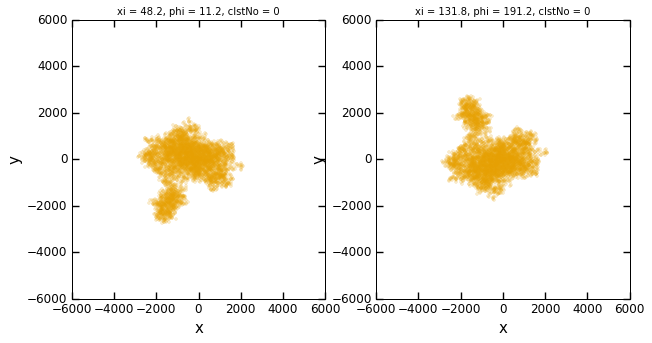

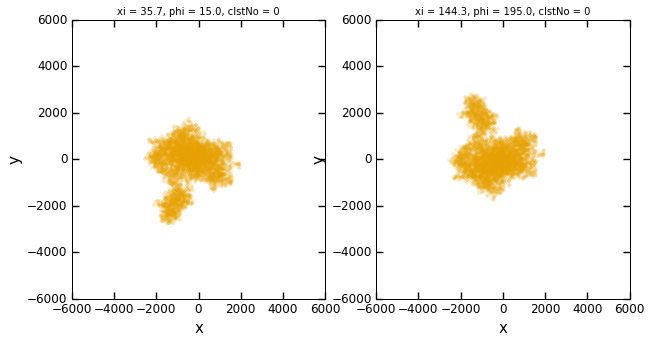

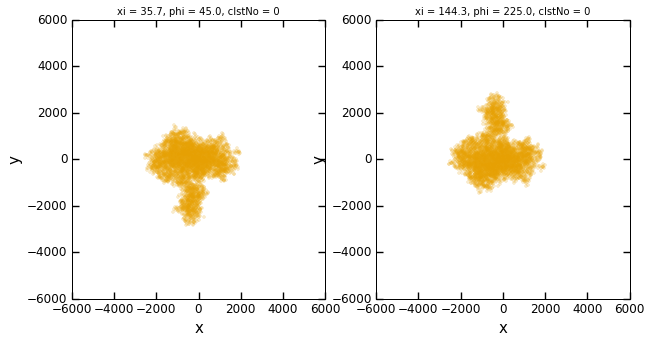

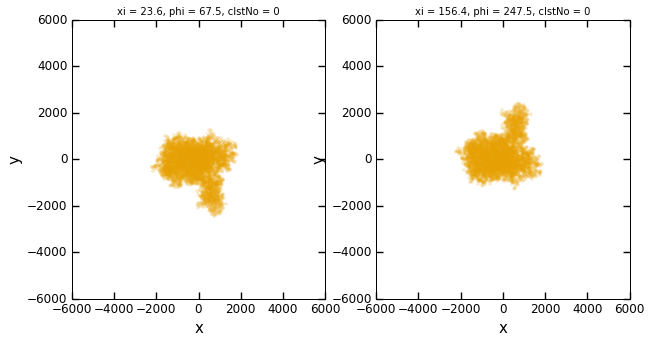

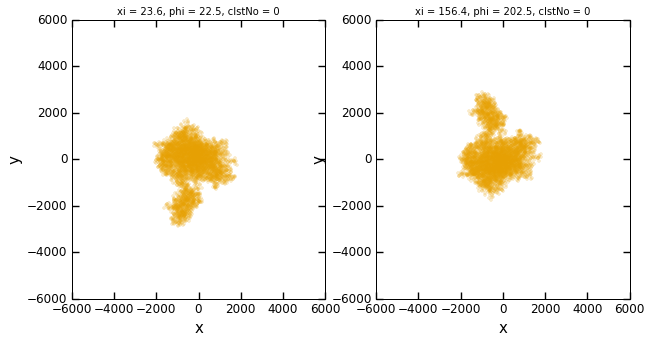

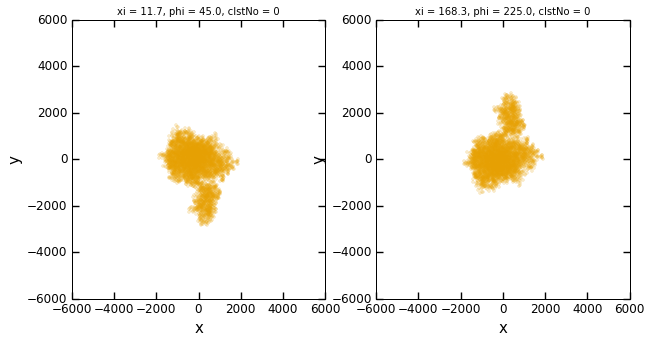

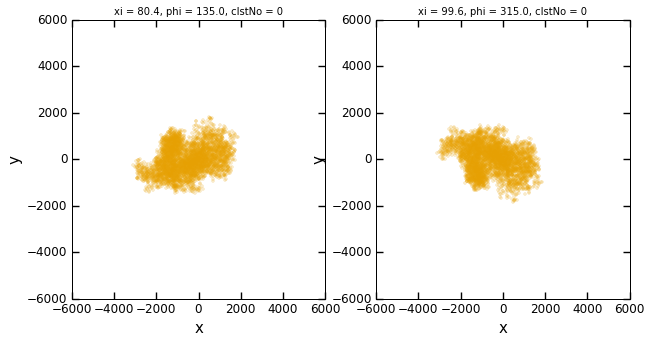

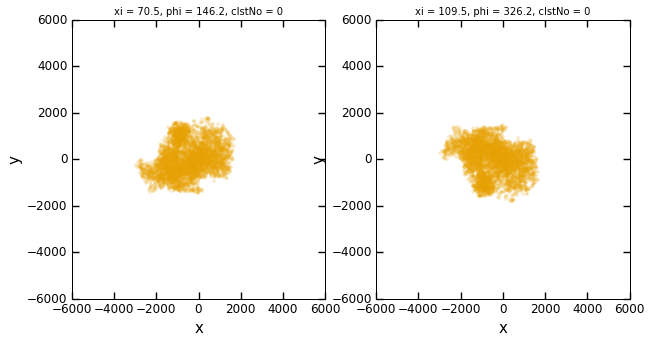

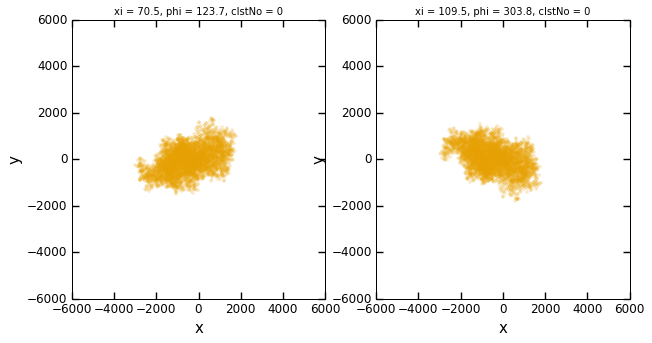

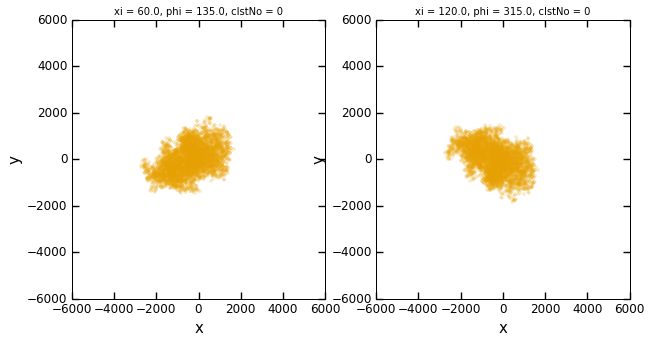

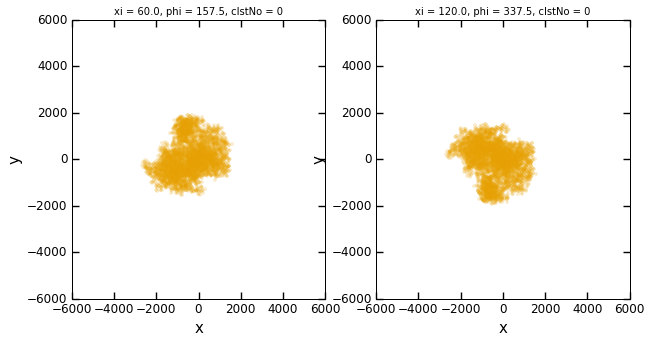

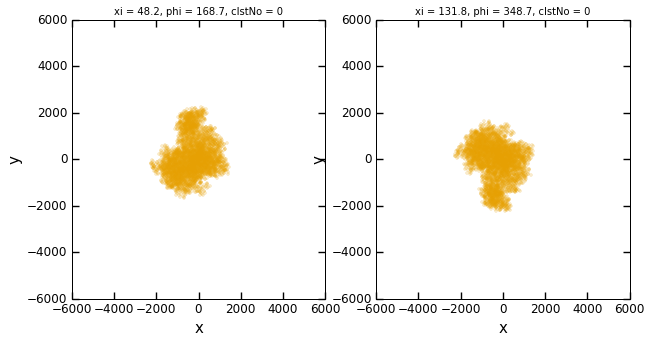

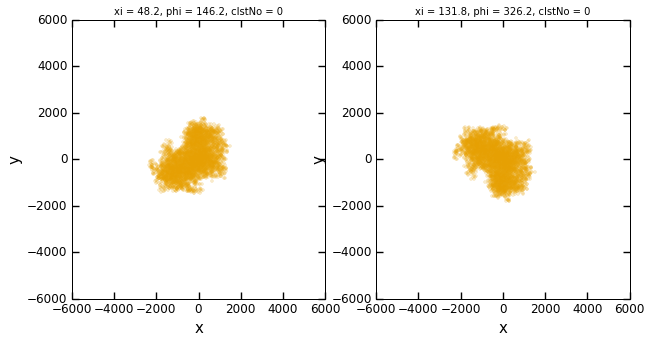

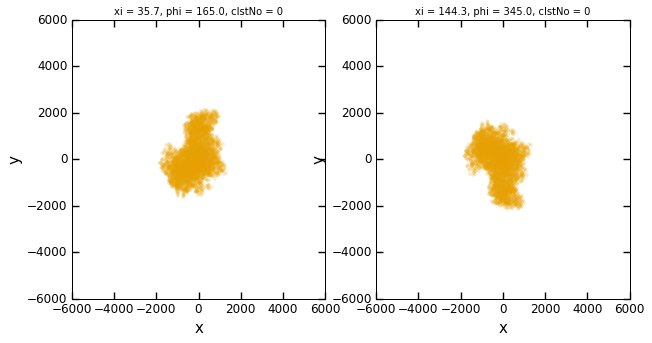

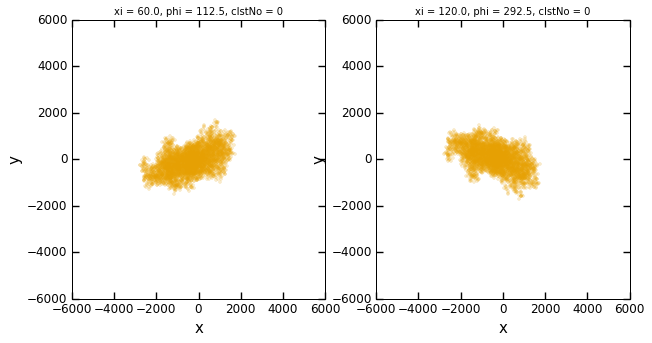

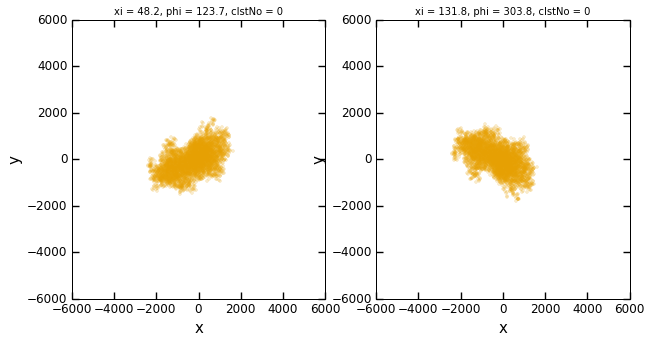

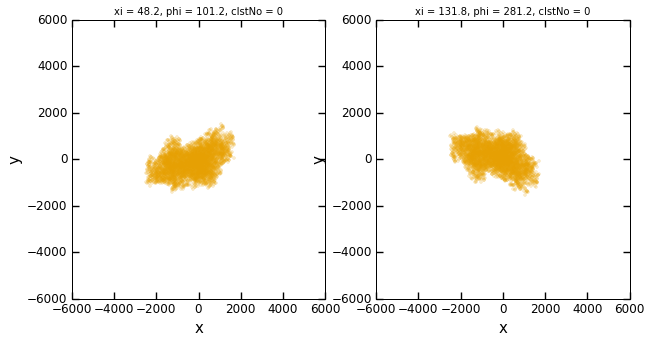

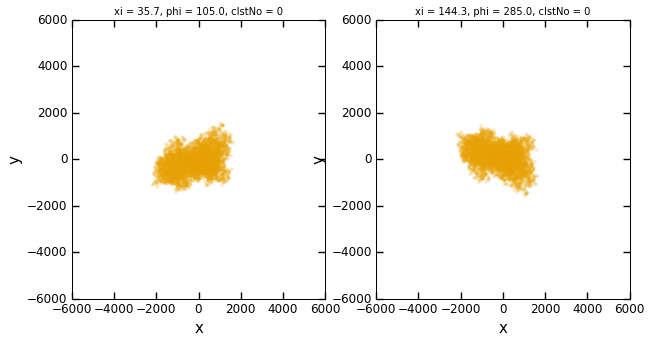

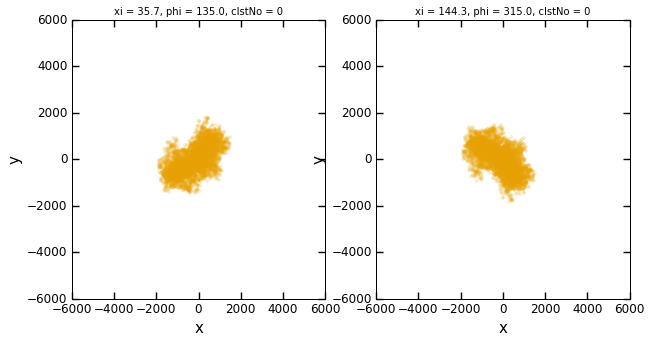

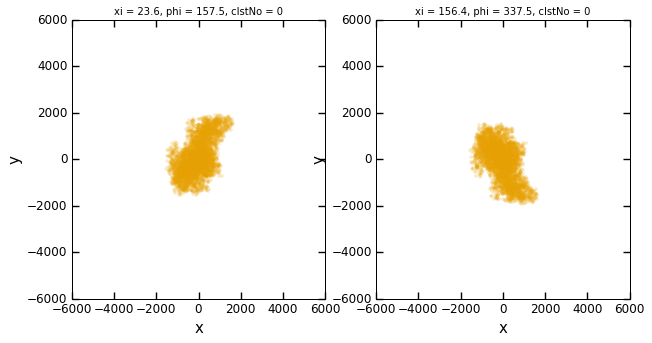

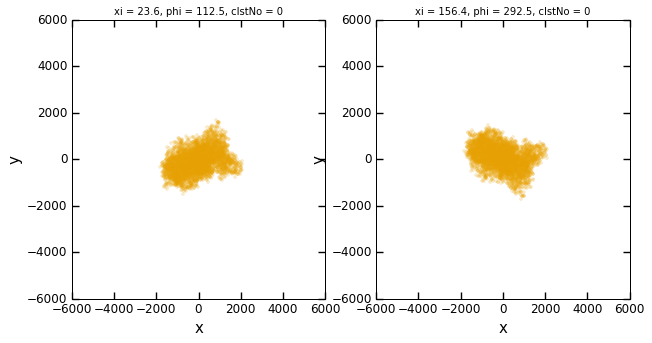

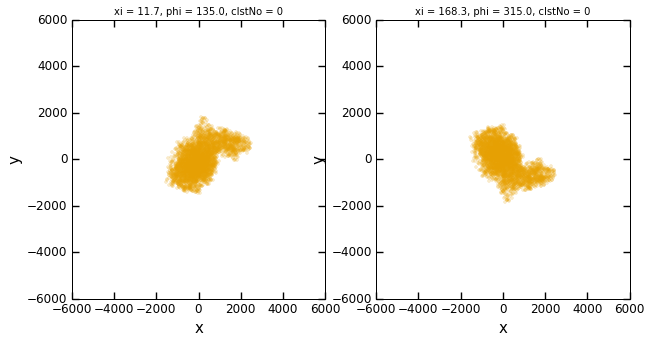

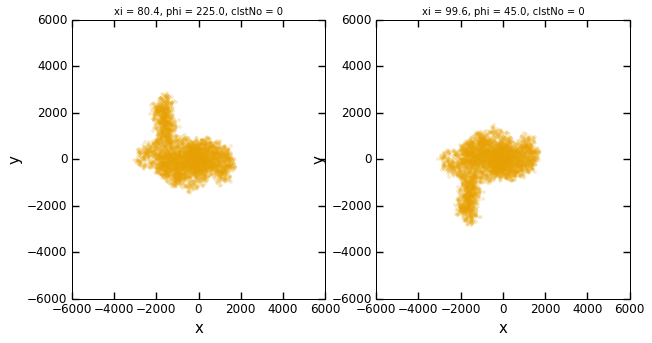

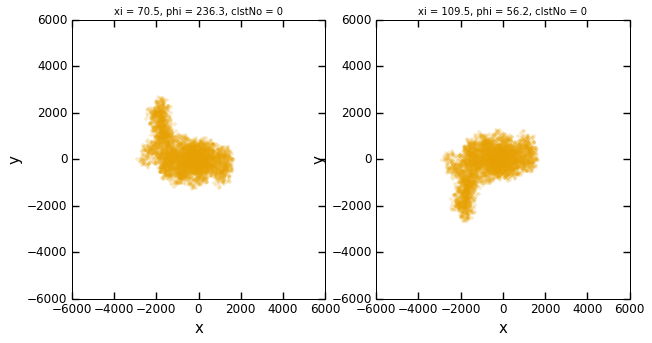

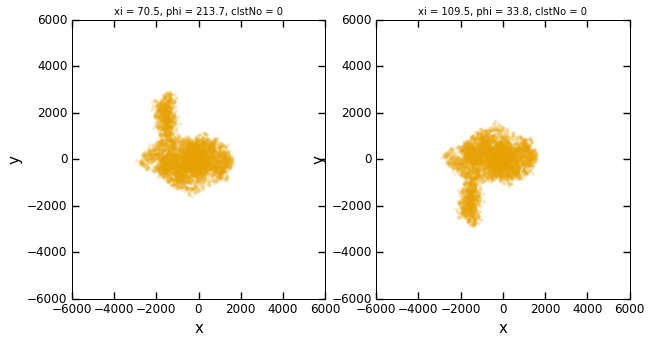

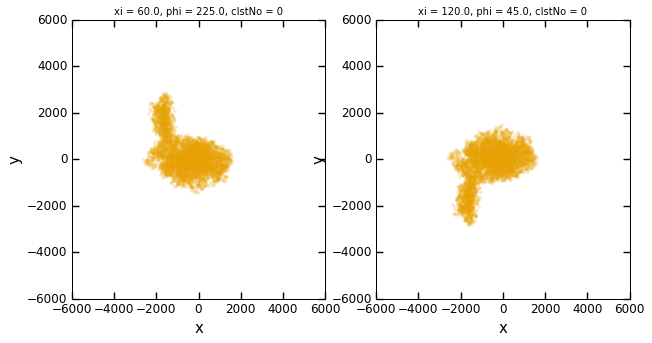

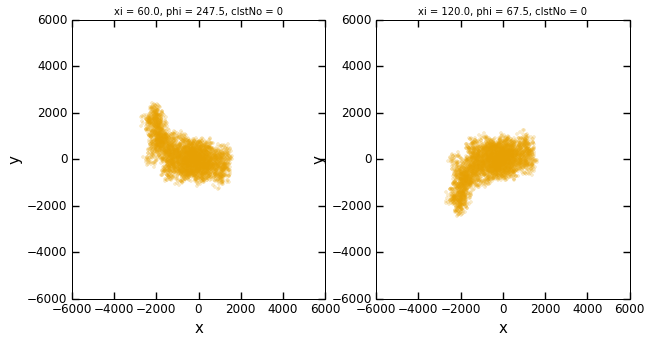

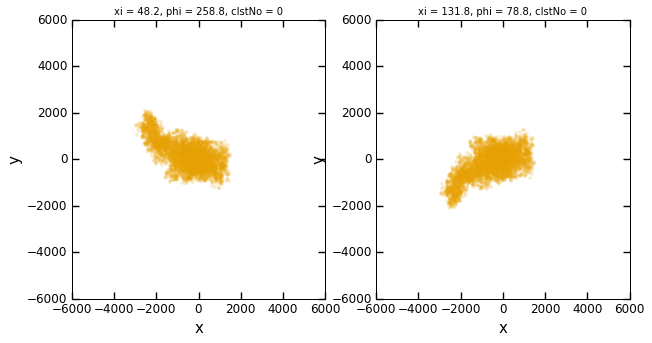

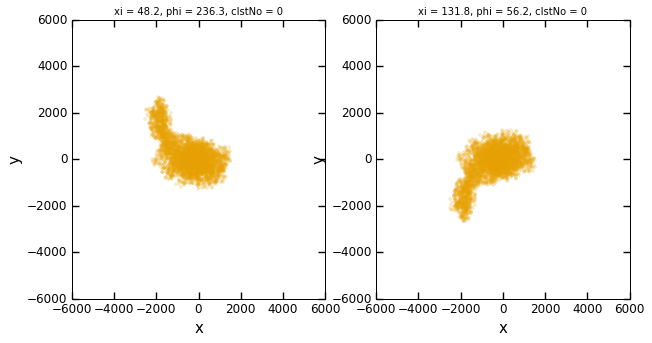

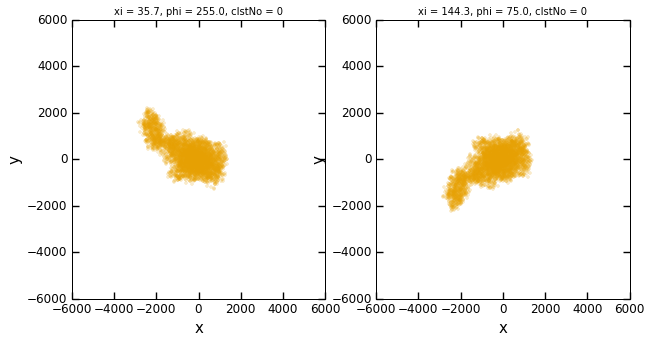

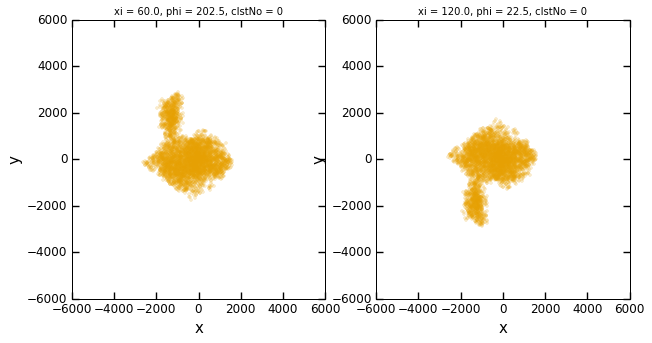

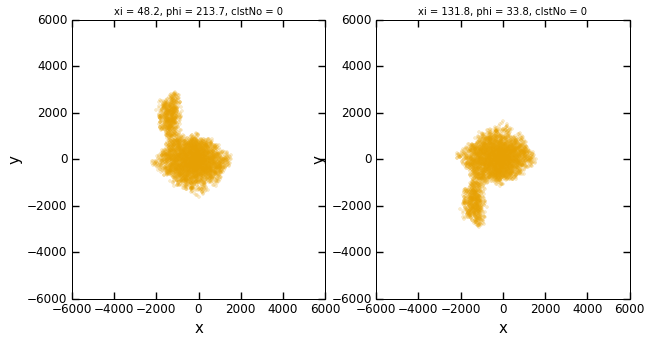

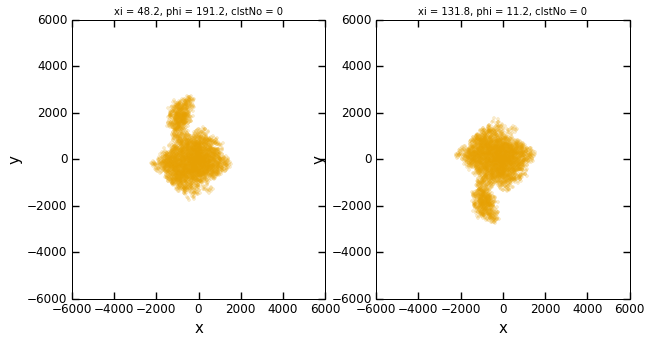

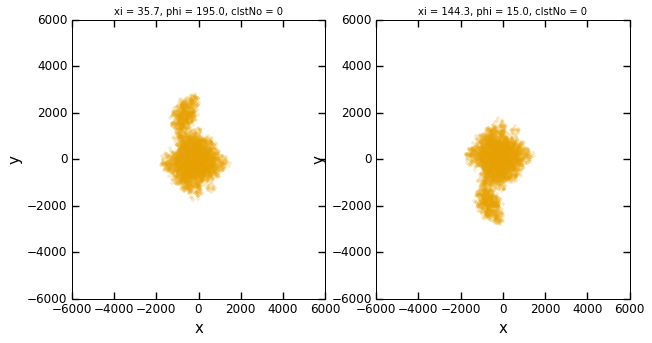

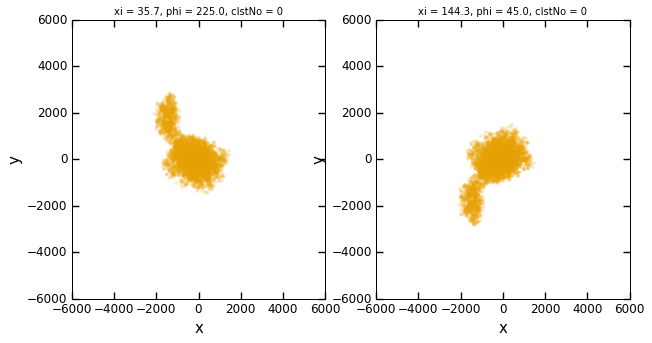

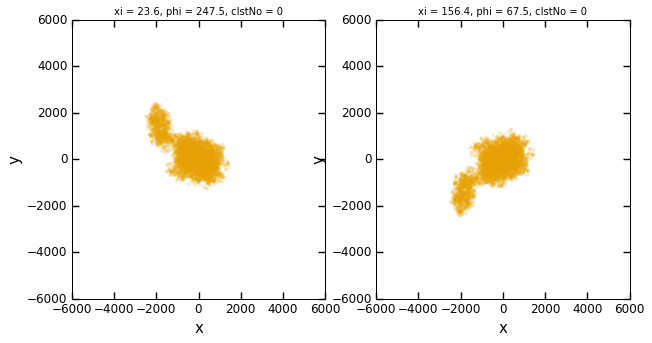

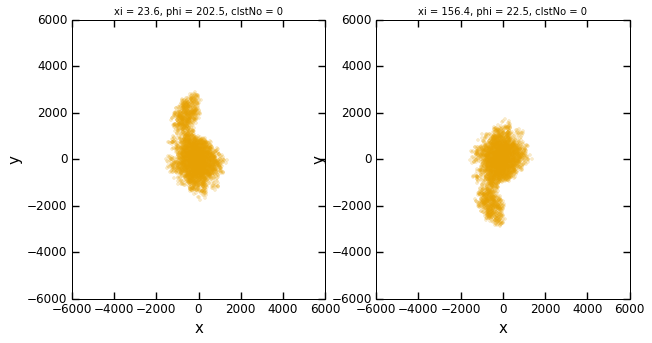

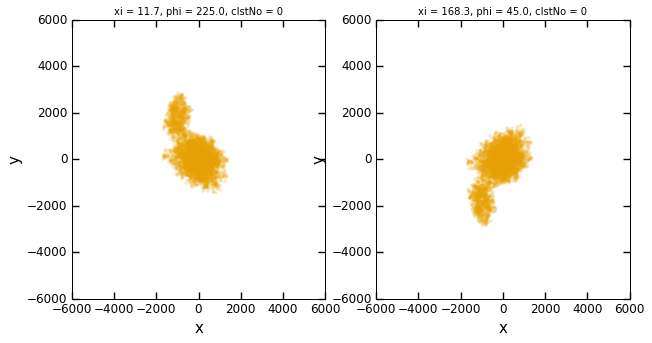

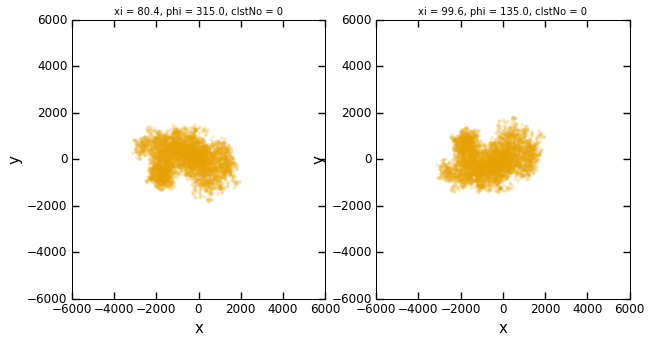

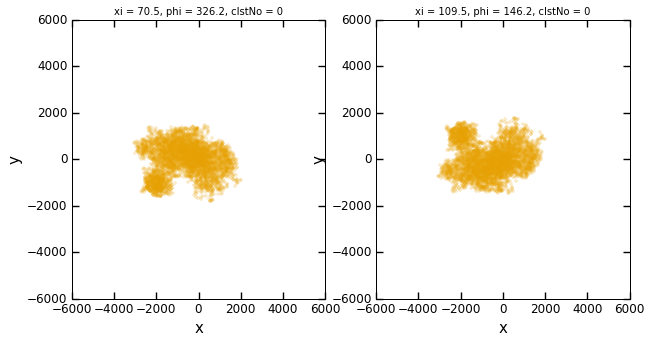

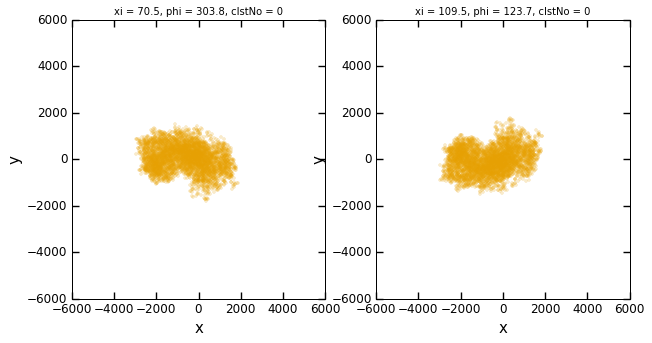

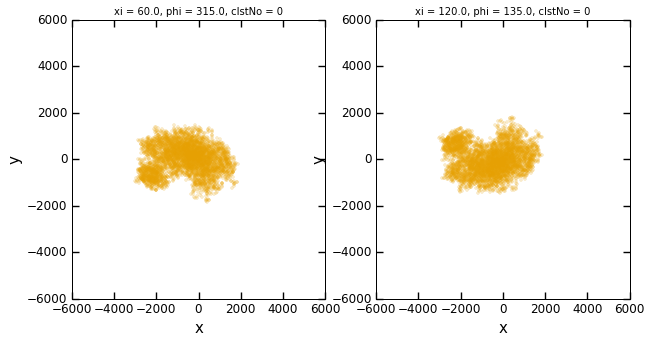

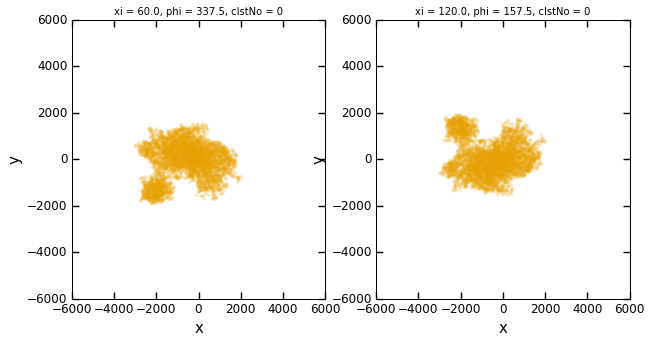

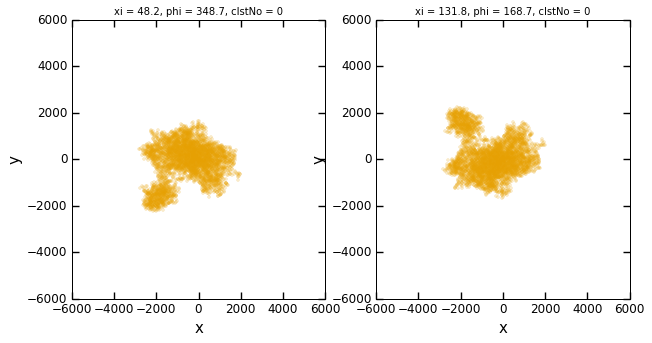

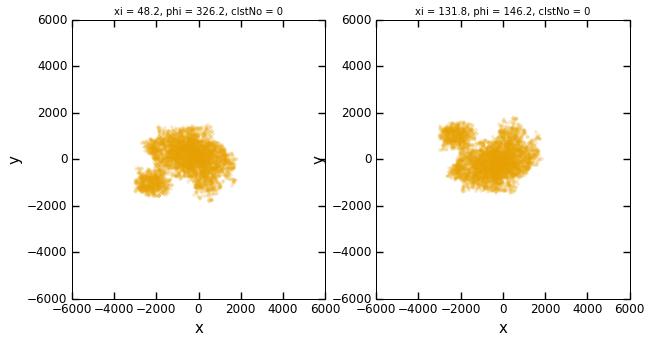

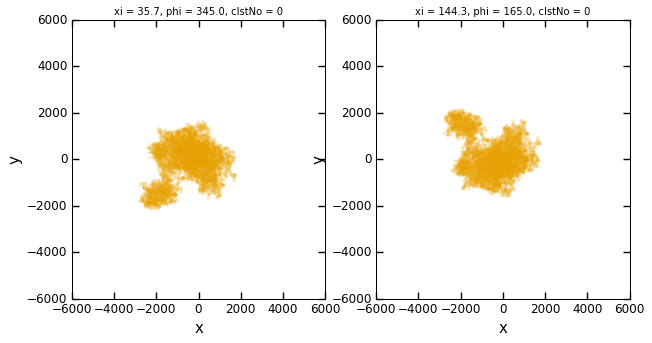

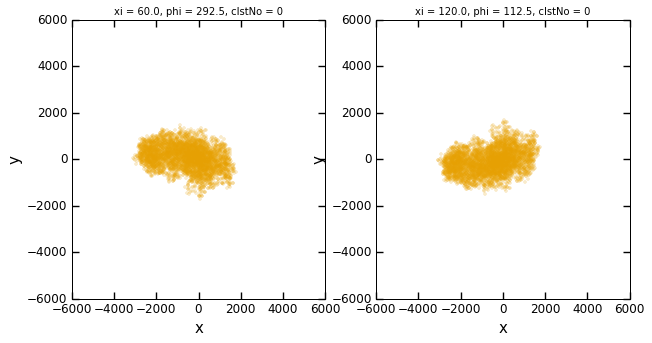

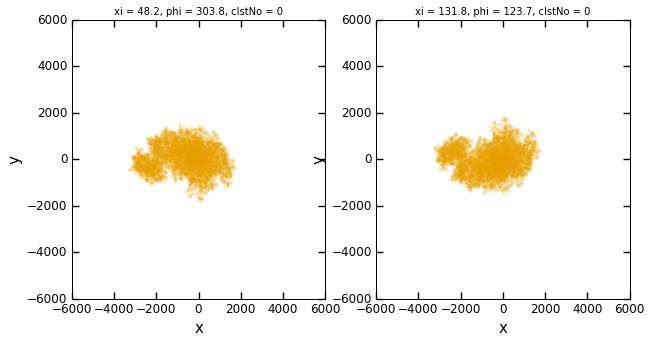

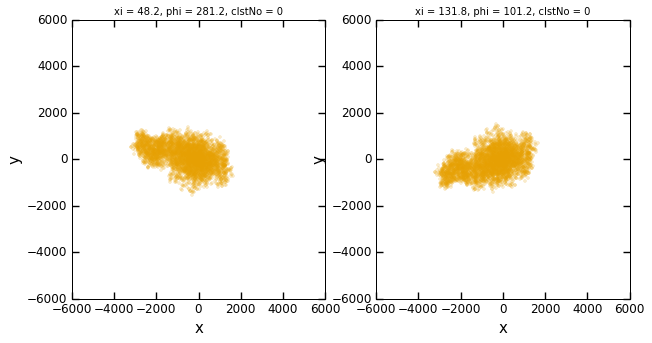

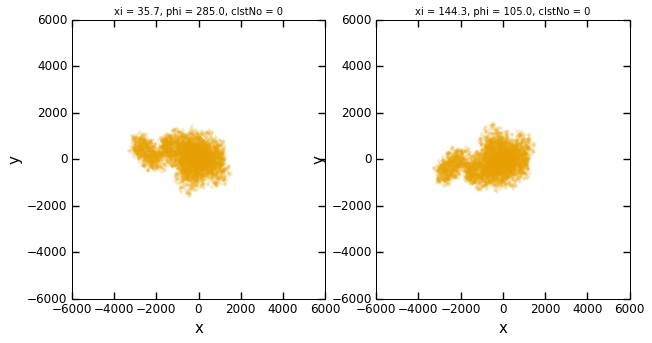

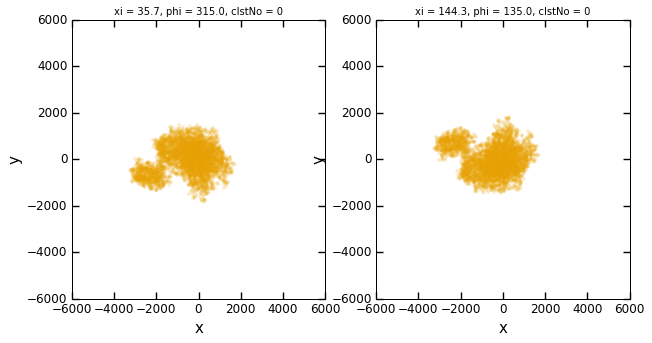

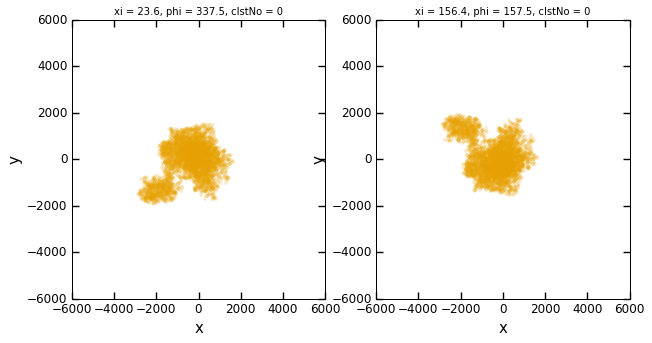

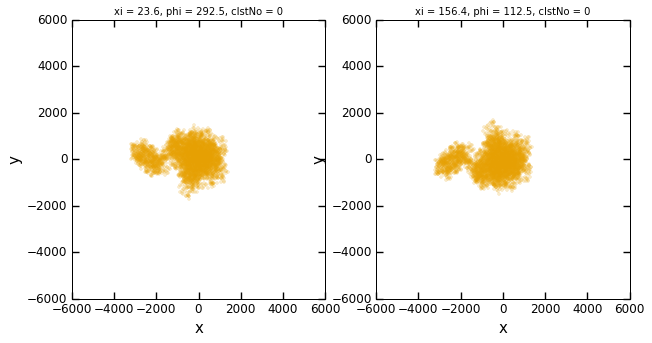

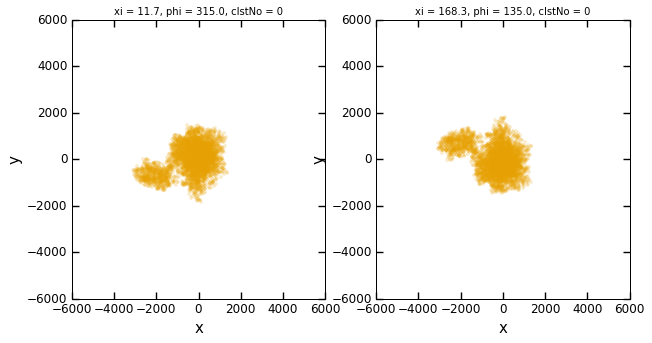

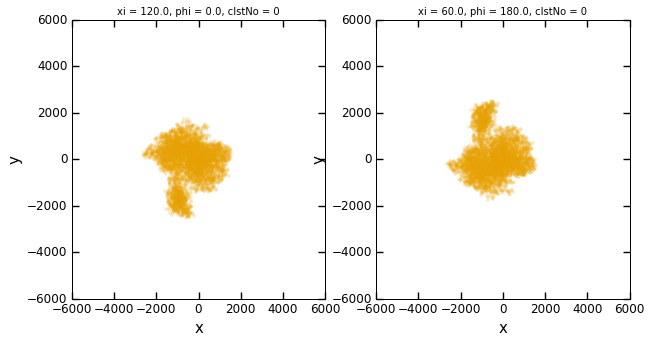

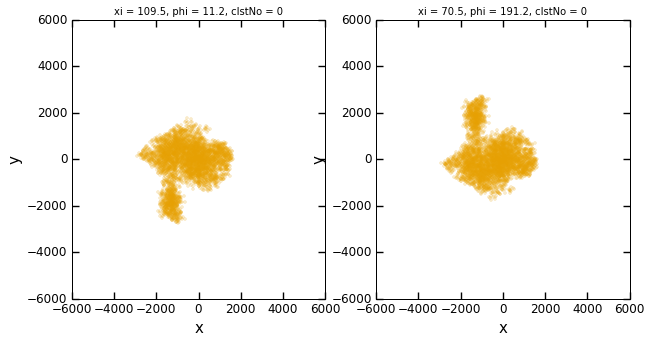

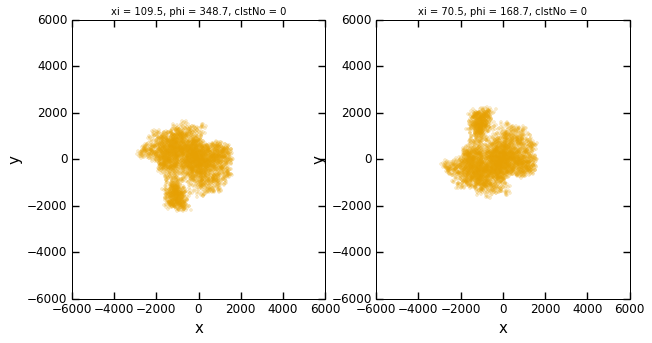

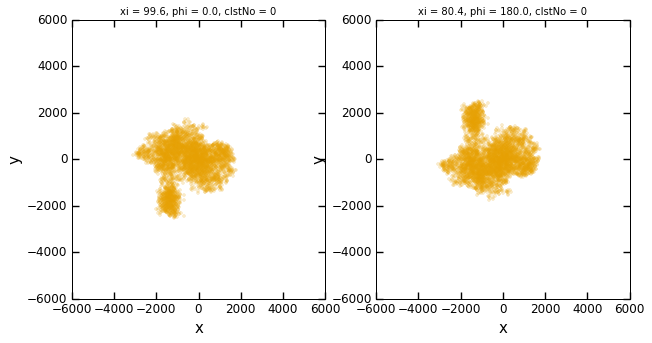

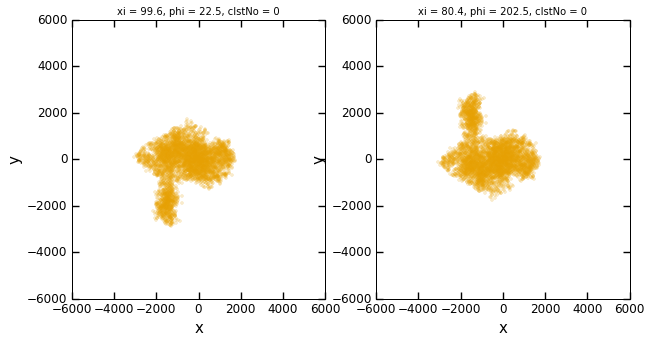

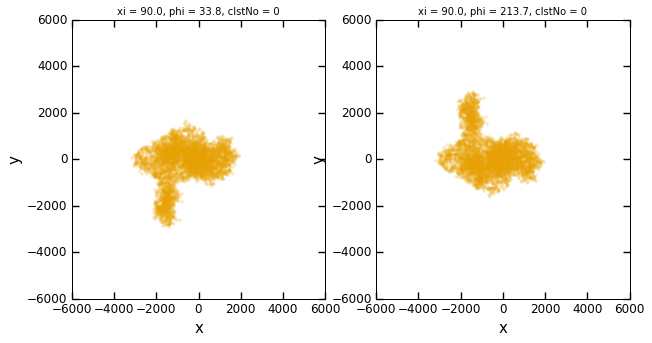

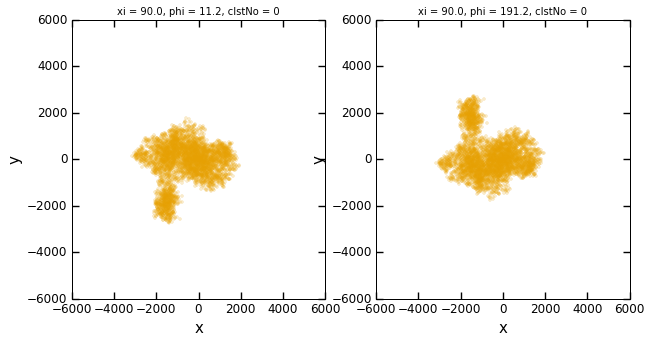

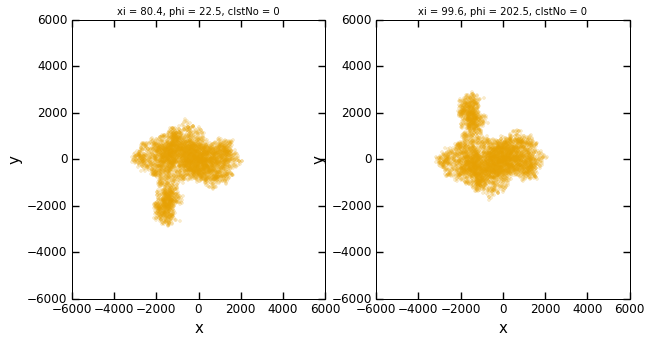

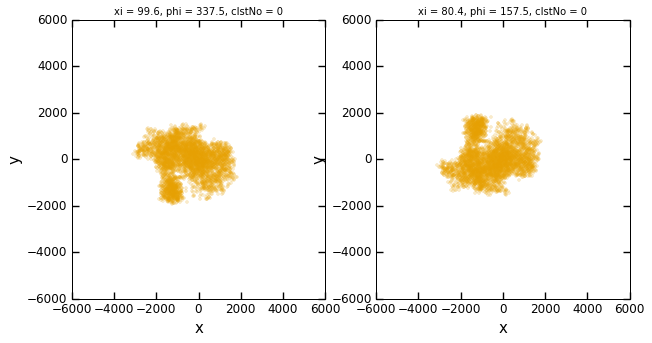

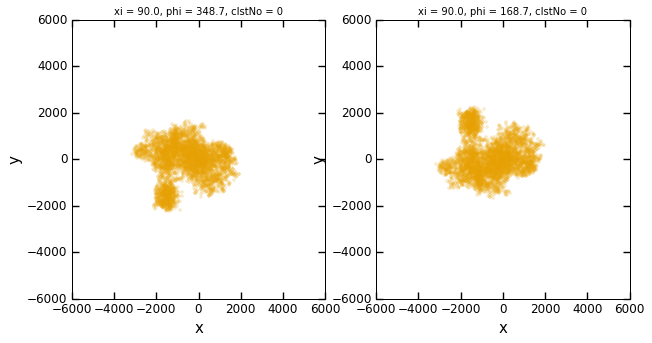

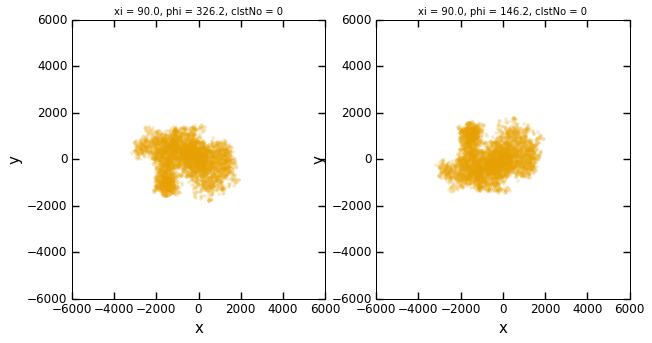

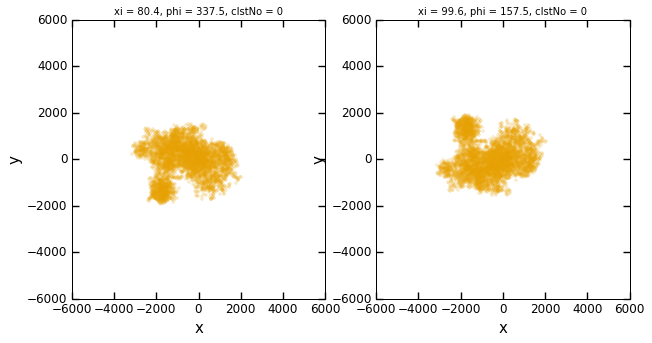

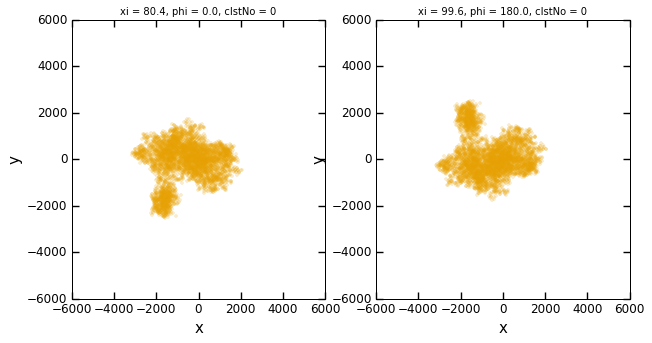

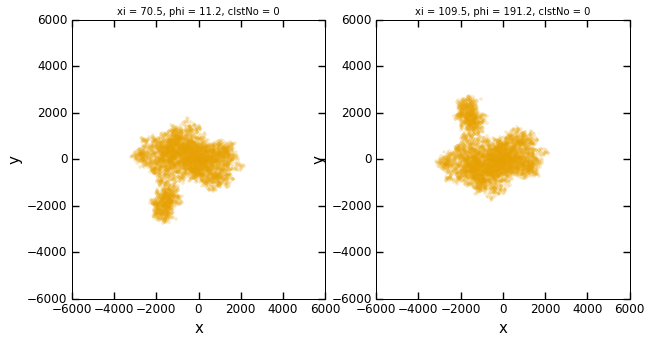

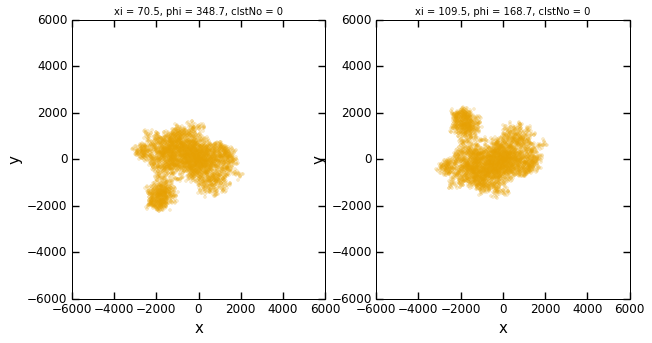

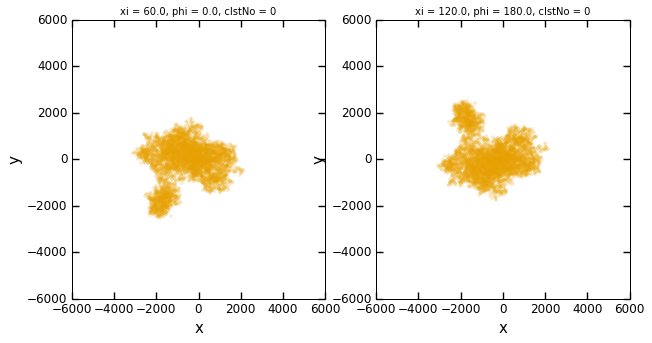

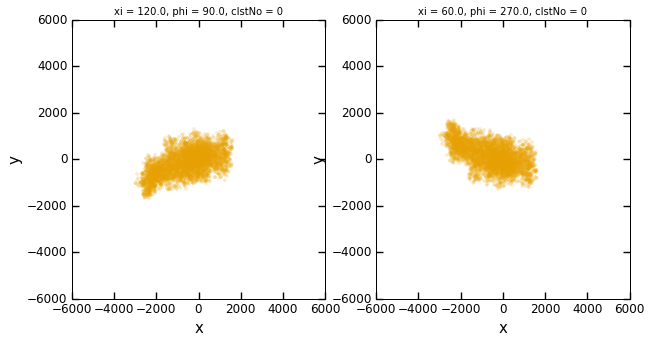

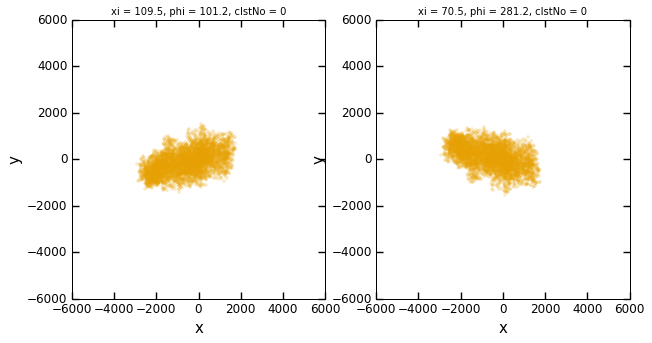

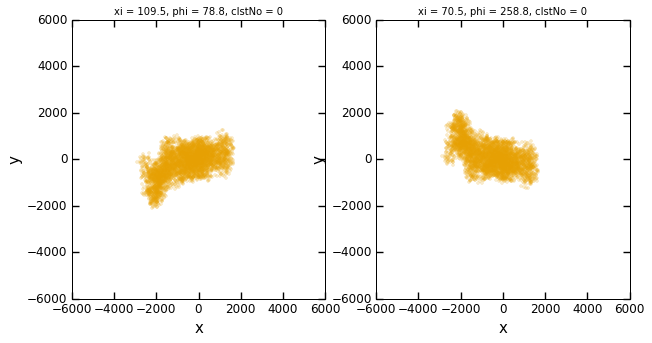

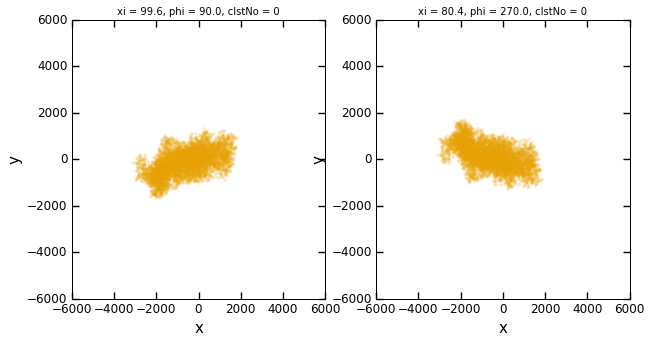

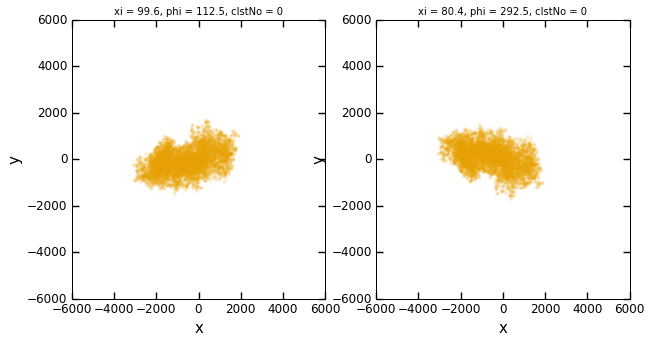

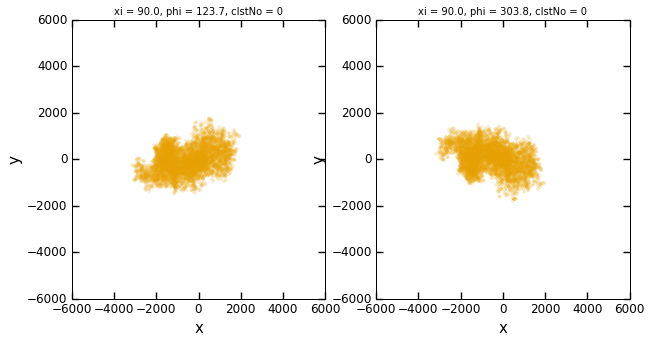

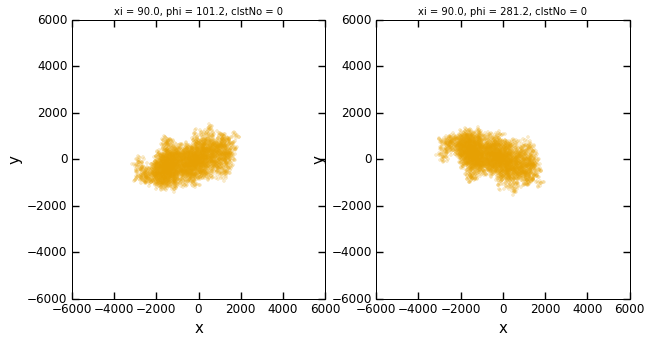

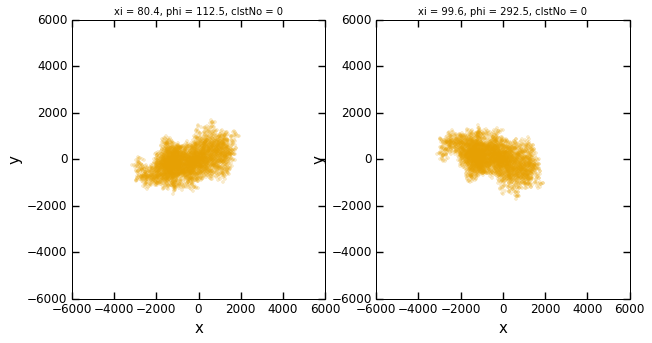

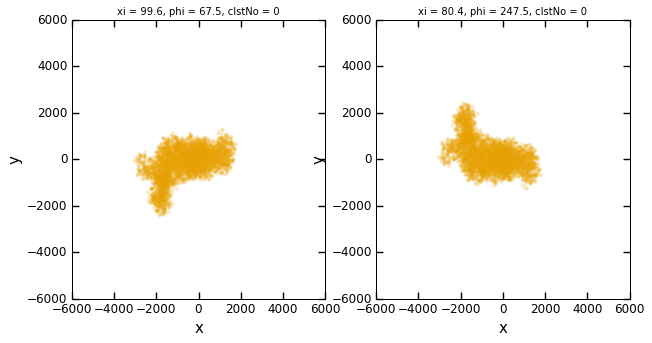

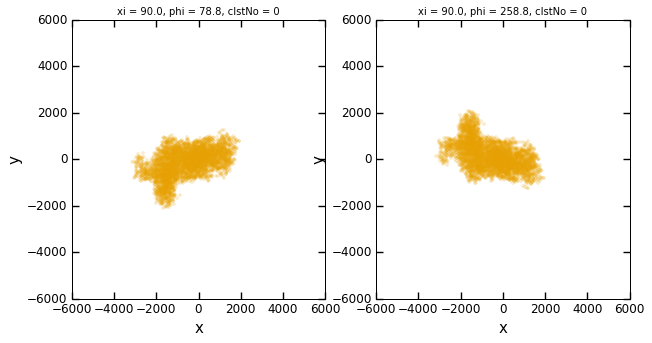

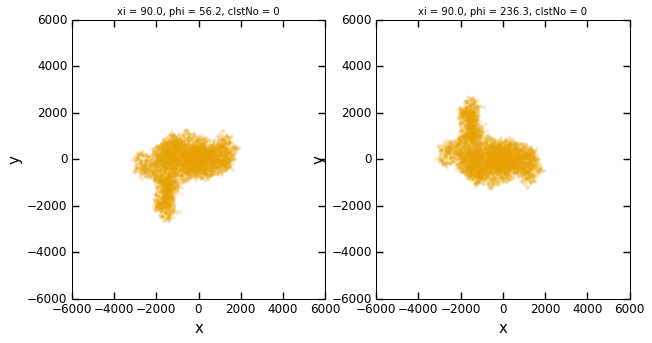

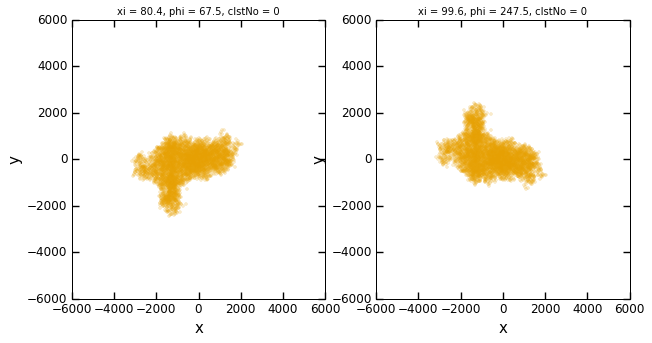

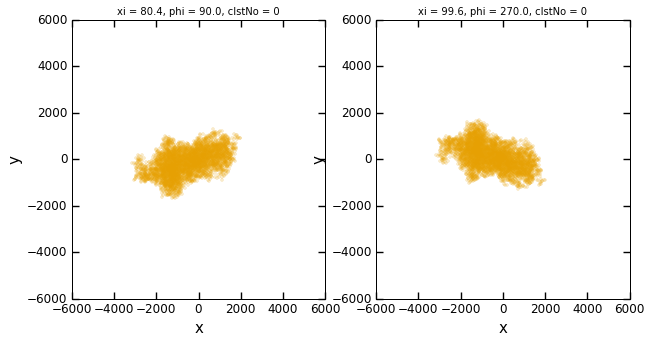

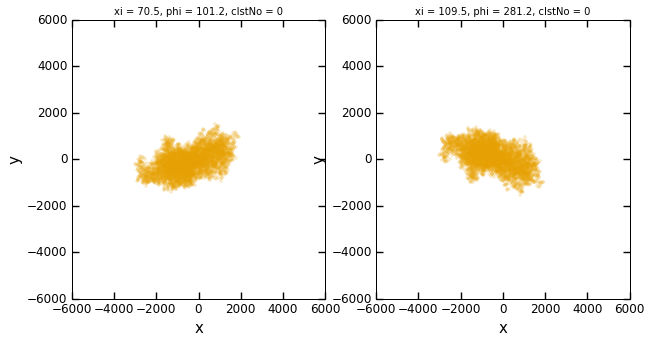

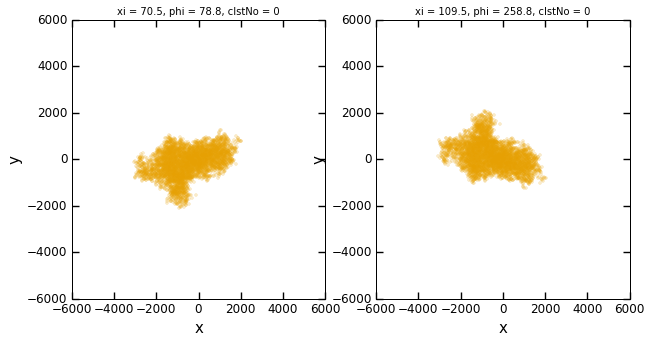

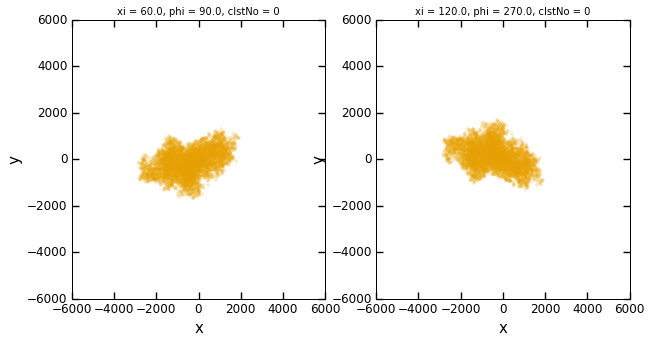

In [122]:


for i in range(len(xi_arr) // 2):

    stuff = df[pos][:5000].apply(lambda x: 
             getg.project_coords(x, xi=xi_arr[first_half[i]], 
                                 phi=phi_arr[first_half[i]], 
                                 los_axis=2, radian=True), axis=1)
    plt.figure(figsize=(10, 5))
    plt.axes().set_aspect('equal')
    stuff = np.array(stuff)

    plt.subplot(121)
    plt.plot(stuff[:, 0], stuff[:, 1], '.', alpha=alpha)
    plt.title('xi = {0:.1f}, phi = {1:.1f}, clstNo = {2}'.format(
        xi_arr[first_half[i]] * 180. / np.pi, 
        phi_arr[first_half[i]] * 180. / np.pi, 
        clstNo), size=10)
    plt.xlim(-6000, 6000)
    plt.ylim(-6000, 6000)
    plt.xlabel('x')
    plt.ylabel('y')

    plt.subplot(122)
    stuff = df[pos][:5000].apply(lambda x: 
         getg.project_coords(x, xi=xi_arr[second_half[i]], 
                             phi=phi_arr[second_half[i]], 
                             los_axis=2, radian=True), axis=1)
    plt.plot(stuff.ix[:, 0], stuff.ix[:, 1], '.', alpha=alpha)
    plt.title('xi = {0:.1f}, phi = {1:.1f}, clstNo = {2}'.format(
        xi_arr[second_half[i]] * 180. / np.pi, 
        phi_arr[second_half[i]] * 180. / np.pi, 
        clstNo), size=10)
    plt.xlim(-6000, 6000)
    plt.ylim(-6000, 6000)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.show()
    plt.close()

# plot the projections

In [ ]:
half_of_sphere

In [88]:
xi_arr * 180. / np.pi

array([  48.1896851,   48.1896851,   48.1896851,   48.1896851,
         90.       ,   90.       ,   90.       ,   90.       ,
        131.8103149,  131.8103149,  131.8103149,  131.8103149])

In [89]:
phi_arr * 180. / np.pi

array([  45.,  135.,  225.,  315.,    0.,   90.,  180.,  270.,   45.,
        135.,  225.,  315.])

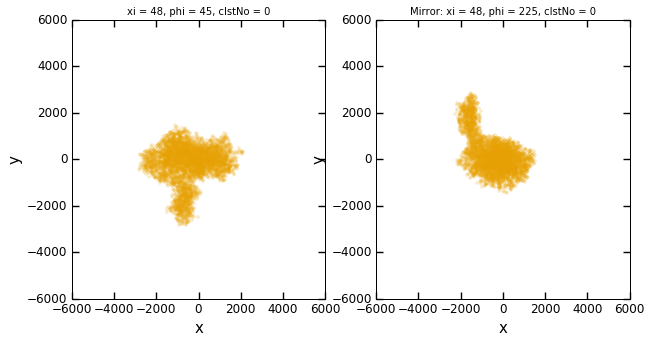

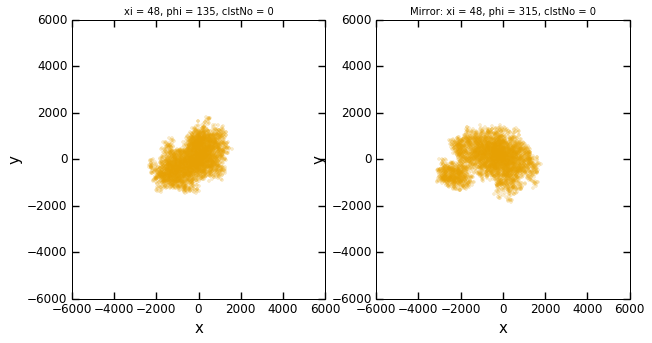

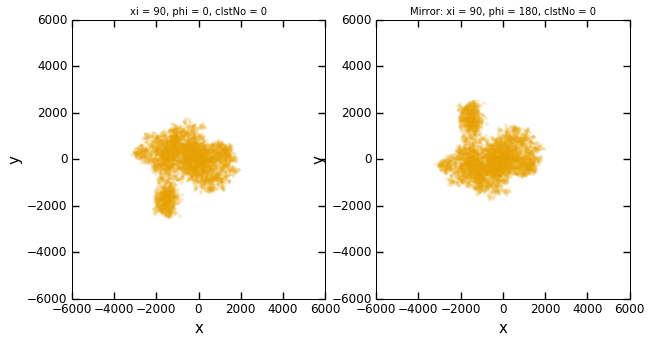

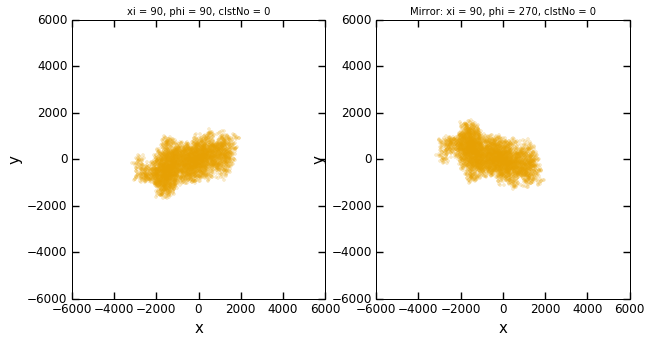

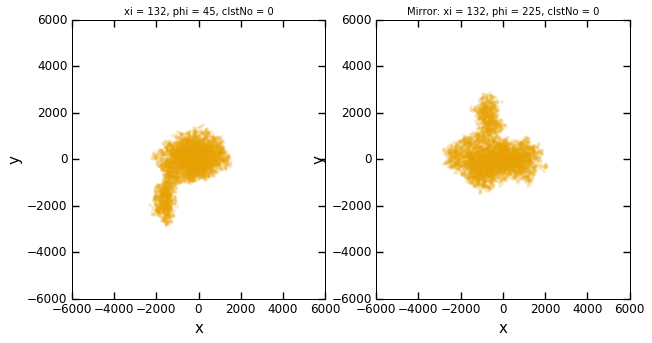

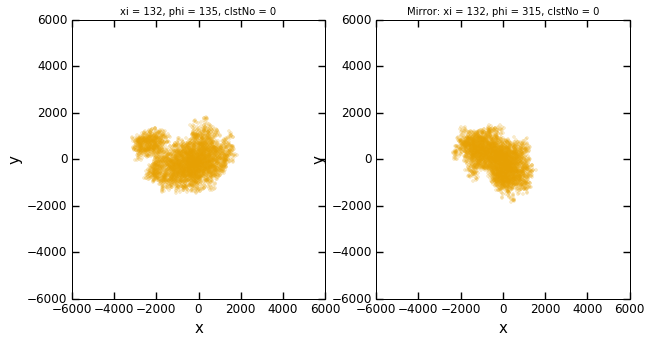

In [84]:
alpha = 0.2
clstNo = 0 

nside = 1
npix = nside2npix(nside)
xi_arr, phi_arr = pix2ang(nside, range(npix))  # , nest=True)
half_of_sphere = phi_arr < np.pi
first_half = zip(xi_arr[half_of_sphere], phi_arr[half_of_sphere])
second_half = zip(xi_arr[~half_of_sphere], phi_arr[~half_of_sphere])


for i in range(len(xi_arr) // 2):

    stuff = df[pos][:5000].apply(lambda x: 
             getg.project_coords(x, xi=first_half[i][0], 
                                 phi=first_half[i][1], 
                                 los_axis=2, radian=True), axis=1)
    plt.figure(figsize=(10, 5))
    plt.axes().set_aspect('equal')
    stuff = np.array(stuff)

    plt.subplot(121)
    plt.plot(stuff[:, 0], stuff[:, 1], '.', alpha=alpha)
    plt.title('xi = {0:.0f}, phi = {1:.0f}, clstNo = {2}'.format(
        first_half[i][0] * 180. / np.pi, 
        first_half[i][1] * 180. / np.pi, 
        clstNo), size=10)
    plt.xlim(-6000, 6000)
    plt.ylim(-6000, 6000)
    plt.xlabel('x')
    plt.ylabel('y')

    plt.subplot(122)
    stuff = df[pos][:5000].apply(lambda x: 
         getg.project_coords(x, xi=second_half[i][0], 
                             phi=second_half[i][1], 
                             los_axis=2, radian=True), axis=1)
    plt.plot(stuff.ix[:, 0], stuff.ix[:, 1], '.', alpha=alpha)
    plt.title('Mirror: xi = {0:.0f}, phi = {1:.0f}, clstNo = {2}'.format(
        second_half[i][0] * 180. / np.pi, 
        second_half[i][1] * 180. / np.pi, 
        clstNo), size=10)
    plt.xlim(-6000, 6000)
    plt.ylim(-6000, 6000)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.show()
    plt.close()

# The projection we have rotates the obj

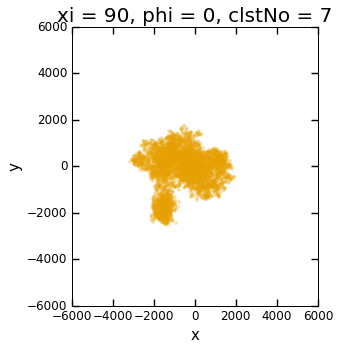

In [43]:
def plot_perspective(xi, phi, clstNo):
    
    stuff = df[pos][:5000].apply(lambda x: 
         getg.project_coords(x, xi=xi, phi=phi, 
                             los_axis=4, radian=False), axis=1)
    plt.figure(figsize=(15, 5))
    plt.axes().set_aspect('equal')
    stuff = np.array(stuff)
    plt.subplot(131)

    plt.plot(stuff[:, 0], stuff[:, 1], '.', alpha=.3)
    plt.title('xi = {0}, phi = {1}, clstNo = {2}'.format(xi, phi, clstNo))
    plt.xlim(-6000, 6000)
    plt.ylim(-6000, 6000)
    plt.xlabel('x')
    plt.ylabel('y')
    

interact(plot_perspective, xi=(0, 180), phi=(0, 180, 10), clstNo=(7, 8, 1))